In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import csv

In [2]:
N = 9

In [7]:
df = pd.read_csv('error_results.csv')
keywords = df.iloc[:,5:].clip(0, 1)
del keywords["as_count"]
del keywords["null_count"]
del keywords["by_count"]
del keywords["when_count"]
del keywords["then_count"]
del keywords["end_count"]
del keywords["keyword_count"]
keywords.rename(columns={
    "order_count":"order by_count",
    "case_count":"case when_count"
}, inplace=True)

In [8]:
means = keywords.mean()
most_important = means.nlargest(N)

In [9]:
most_important

return_count    0.692308
match_count     0.407692
merge_count     0.369231
create_count    0.346154
call_count      0.315385
with_count      0.300000
target.1        0.276923
unwind_count    0.161538
delete_count    0.161538
dtype: float64

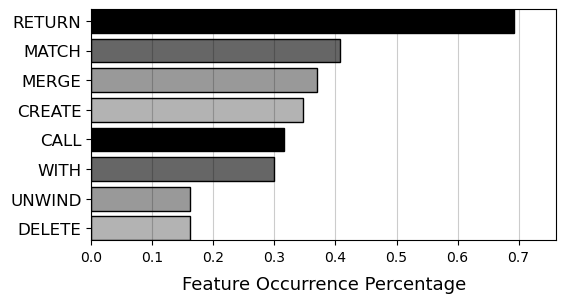

In [12]:
fig = plt.figure(figsize=[6, 3])

plt.style.use('grayscale')

for i, v in most_important.items():
    if i.endswith("_count"):
        plt.barh(i.removesuffix("_count").upper(), v, height=0.8, edgecolor='#000')
        
plt.xlabel('Feature Occurrence Percentage', size=13, labelpad=8)

plt.yticks(size=12)

plt.gcf().set_facecolor('white')

plt.gca().invert_yaxis()

plt.margins(0.1, 0)

plt.grid(True, axis='x', alpha=0.2)

plt.savefig('feature_distribution.pdf', format='pdf', bbox_inches='tight')